In [60]:
#import library
import pandas as pd
import numpy as np
import math

In [61]:
dataset = pd.read_csv('arrhythmia.data', header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [62]:
import pandas as pd
import numpy as np

# Baca dataset dari file
with open('arrhythmia.data', 'r') as file:
    lines = file.readlines()

# Preprocessing
processed_data = []
for line in lines:
    row = line.strip().split(',')
    processed_row = []
    for col in row[:-1]:
        if col == '?':
            col = np.nan
        else:
            col = float(col)
            if col.is_integer():
                col = int(col)
        processed_row.append(col)
    processed_data.append(processed_row)

dataset_processed = pd.DataFrame(processed_data)

for col in dataset_processed:
    if dataset_processed[col].dtype == int:
        is_finite = np.isfinite(dataset_processed[col])
        dataset_processed.loc[is_finite, col].apply(lambda x: int(x) if f'{x}'.endswith('.0') else x)

print(dataset_processed)


     0    1    2    3    4    5    6    7    8    9    ...  269  270   271  \
0     75    0  190   80   91  193  371  174  121  -16  ... -0.3  0.0   9.0   
1     56    1  165   64   81  174  401  149   39   25  ... -0.5  0.0   8.5   
2     54    0  172   95  138  163  386  185  102   96  ...  0.9  0.0   9.5   
3     55    0  175   94  100  202  380  179  143   28  ...  0.1  0.0  12.2   
4     75    0  190   80   88  181  360  177  103  -16  ... -0.4  0.0  13.1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0  0.0   4.3   
448   37    0  190   85  100  137  361  201   73   86  ... -0.5  0.0  15.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  1.2  0.0  16.3   
450   32    1  155   55   93  106  386  218   63   54  ...  0.2 -0.4  12.0   
451   78    1  160   70   79  127  364  138   78   28  ... -0.3  0.0  10.4   

      272  273  274  275  276   277   278  
0    -0.9  0.0    0

In [63]:
#drop kolom 13 karena jumlah null valuenya paling tinggi
dataset.drop(columns = 13, inplace = True)

In [52]:
dataset_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [64]:
dataset.columns = dataset_columns

In [65]:
print_column = ["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]
dataset = dataset[print_column]
dataset.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [66]:
dataset.isnull().sum()

Age        0
Sex        0
Height     0
Weight     0
QRS_Dur    0
          ..
V6276      0
V6277      0
V6278      0
V6279      0
class      0
Length: 177, dtype: int64

In [67]:
dataset.duplicated().sum()

0

In [68]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

<ipython-input-68-9067cb8c14c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop_duplicates(inplace=True)


0

In [69]:
dataset.shape

(452, 177)

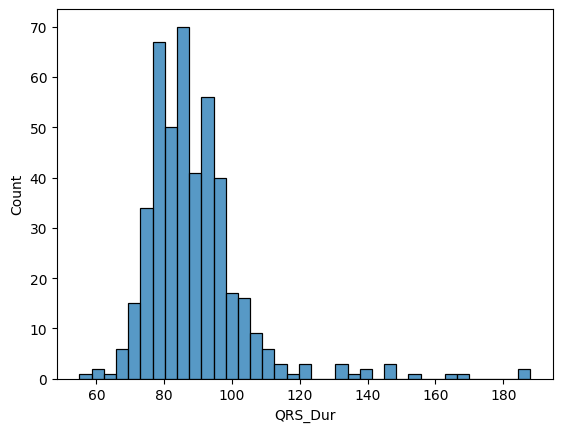

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='QRS_Dur', data=dataset,)
plt.show()

In [71]:
dataset.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [14]:
dataset = dataset.replace('?', np.nan)#replace data
dataset = dataset.astype(float) #ubah data

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Columns: 177 entries, Age to class
dtypes: float64(177)
memory usage: 628.6 KB


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

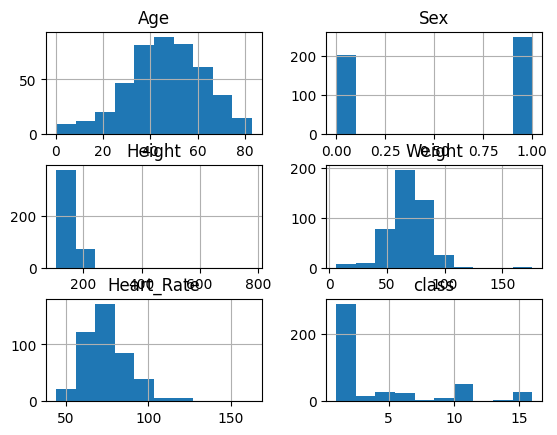

In [16]:
df = dataset.hist(["Age", "Sex", "Height", "Weight", "Heart_Rate", "class"])
df

NORMALIZATION

In [18]:
#Fungsi Normalisasi
def norm(allData, columnTarget):
  for column in columnTarget:
    allData[column] = (allData[column]-allData[column].min()) / (allData[column].max()-allData[column].min())
    
  return allData

SPLIT VALUE

In [19]:
diagnose_result = []
for diagnose in dataset['class']:
    if diagnose == 1:
        diagnose_result.append('Normal ECG')
    else:
        diagnose_result.append('Risk')
dataset["result"] = np.array(diagnose_result)
dataset.drop(columns = ["class"],inplace = True)
dataset.result.value_counts()

Normal ECG    245
Risk          207
Name: result, dtype: int64

In [20]:
#untuk membuktikan hasil
def splitTruth(dataset, columnTarget):
    truthData = []
    for truth in dataset[columnTarget].unique():
        truthData.append(dataset[dataset[columnTarget] == truth])
    
    return truthData

risk, normal = splitTruth(dataset, columnTarget='result')

In [21]:
print(normal)
print(risk)

      Age  Sex  Height  Weight  QRS_Dur  P-R_Int  Q-T_Int  T_Int  P_Int   QRS  \
3    55.0  0.0   175.0    94.0    100.0    202.0    380.0  179.0  143.0  28.0   
6    40.0  1.0   160.0    52.0     77.0    129.0    377.0  133.0   77.0  77.0   
7    49.0  1.0   162.0    54.0     78.0      0.0    376.0  157.0   70.0  67.0   
8    44.0  0.0   168.0    56.0     84.0    118.0    354.0  160.0   63.0  61.0   
11   45.0  1.0   165.0    86.0     77.0    143.0    373.0  150.0   65.0  12.0   
..    ...  ...     ...     ...      ...      ...      ...    ...    ...   ...   
445  45.0  0.0   175.0    75.0     91.0    134.0    376.0  160.0   83.0  91.0   
446  20.0  1.0   157.0    57.0     81.0    151.0    363.0  166.0   80.0  43.0   
447  53.0  1.0   160.0    70.0     80.0    199.0    382.0  154.0  117.0 -37.0   
450  32.0  1.0   155.0    55.0     93.0    106.0    386.0  218.0   63.0  54.0   
451  78.0  1.0   160.0    70.0     79.0    127.0    364.0  138.0   78.0  28.0   

     ...  V6271  V6272  V62

COUNT AVERAGE & STANDARD DEVIATION

In [22]:
dataset.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


In [23]:
#hitung rata-rata
def average(normal, risk, columnTarget):
  Mnormal = dict()
  Mrisk = dict()
  for column in columnTarget :
    Mnormal[column] = normal[column].mean()
    Mrisk[column] = risk[column].mean()

  return Mnormal, Mrisk

Mnormal, Mrisk = average(normal, risk, columnTarget = ["Age", "Sex", "Height", "Weight", "Heart_Rate"])

print(f"Mean Result\n1 : {Mnormal}\n0 : {Mrisk}")

Mean Result
1 : {'Age': 46.2734693877551, 'Sex': 0.6530612244897959, 'Height': 164.10204081632654, 'Weight': 68.66938775510204, 'Heart_Rate': 73.2}
0 : {'Age': 46.70531400966183, 'Sex': 0.42995169082125606, 'Height': 168.65700483091788, 'Weight': 67.57971014492753, 'Heart_Rate': 75.96601941747574}


In [24]:
#standard deviation
def std(normal, risk, columnTarget):
  STDnormal = dict()
  STDrisk = dict()
  for column in columnTarget :
    STDnormal[column] = normal[column].std()
    STDrisk[column] = risk[column].std()

  return STDnormal, STDrisk

STDnormal, STDrisk = std(normal, risk, columnTarget = ["Age", "Sex", "Height", "Weight", "Heart_Rate"])

print(f"Standard Deviation Result\n1 : {STDnormal}\n0 : {STDrisk}")

Standard Deviation Result
1 : {'Age': 14.556092402453762, 'Sex': 0.47697047749324467, 'Height': 8.048125985816393, 'Weight': 14.454595447180552, 'Heart_Rate': 9.159604830763044}
0 : {'Age': 18.508594717599085, 'Sex': 0.4962690876567189, 'Height': 54.19242268456271, 'Weight': 18.828097520096282, 'Heart_Rate': 17.840863226397868}


FOLDING DATA

In [25]:
#probability
def probability_cal(mean, std, x):
  exponent = math.exp(-(x-mean)**2 / (2*(std**2)))
  return (1/ (math.sqrt(2*math.pi)*std)) * exponent

In [26]:
def confussionMatrix(result):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  x = True
  for i in result:
    if(i['Ground Truth'] == '?'):
      x = False
      break
    elif((i['Prediction Result'] == 1)and(i['Prediction Result'] == i['Ground Truth'])):
      TP += 1
    elif((i['Prediction Result'] == 0)and(i['Prediction Result'] == i['Ground Truth'])):
      TN += 1
    elif((i['Prediction Result'] == 1)and(i['Prediction Result'] != i['Ground Truth'])):
      FP += 1
    elif((i['Prediction Result'] == 0)and(i['Prediction Result'] != i['Ground Truth'])):
      FN += 1

  if(x):
    print(f"\nTP : {TP} FN : {FP}\nTN : {TN} FN : {FN}")
    print(f"Accuracy : {((TP+TN)/(TP+TN+FP+FN))*100}%")
    print(f"Precission : {((TP)/(TP+FP))*100}%")
    print(f"Recall : {((TP)/(TP+FN))*100}%")
  else:
    print("\nCannot process the confussion matrix with unknown Ground Truth!")

In [27]:
def calculate_accuracy(predictions, ground_truth):
    correct = 0
    total = len(predictions)

    for prediction, truth in zip(predictions, ground_truth):
        if prediction == truth:
            correct += 1

    accuracy = (correct / total) * 100
    return accuracy

In [28]:
def doprediction(Mnormal, STDnormal, Mrisk, STDrisk, target, columnTarget, truthColumn):
    predictions = []
    ground_truth = []
    for i in range(len(target)):
        yesResult = 1
        noResult = 1
        for column in columnTarget:
            yesResult *= probability_cal(Mnormal[column], STDnormal[column], target[column].iloc[i])
            noResult *= probability_cal(Mrisk[column], STDrisk[column], target[column].iloc[i])
        prediction = int(yesResult > noResult)
        ground_truth.append(target[truthColumn].iloc[i])
        predictions.append(prediction)

    accuracy = calculate_accuracy(predictions, ground_truth)
    return accuracy, predictions, ground_truth

In [29]:
def folding(dataset, trainingPercentage, shuffle=True):
    if shuffle:
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    
    lengthTraining = int(len(dataset) * trainingPercentage / 100)
    train = dataset.iloc[:lengthTraining].reset_index(drop=True)
    validation = dataset.iloc[lengthTraining:].reset_index(drop=True)
    
    return train, validation

In [30]:
trainData, testData = folding(dataset.copy(), 80, shuffle=True)
#print(trainData)
print(f"\nTrain data row x column : {trainData.shape}\n\n TEST DATA :")
#print(testData)
print(f"\nTest data row x column : {testData.shape}\n")


Train data row x column : (361, 177)

 TEST DATA :

Test data row x column : (91, 177)



In [31]:
yesDataTrain, noDataTrain = splitTruth(trainData, columnTarget='result')
#print(yesDataTrain)
print(f"\n yesDataTrain row x column : {yesDataTrain.shape}\n\n NO DATA TRAIN:")
#print(noDataTrain)
print(f"\n noDataTrain row x column : {noDataTrain.shape}\n")


 yesDataTrain row x column : (189, 177)

 NO DATA TRAIN:

 noDataTrain row x column : (172, 177)



In [32]:
trainData, validationData = folding(dataset.copy(), 70, 'left')

In [33]:
import pandas as pd

# Ubah kolom 'Age' menjadi float
testData['Age'] = pd.to_numeric(testData['Age'], errors='coerce')

# Jatuhkan baris dengan nilai NaN di kolom 'Age'
target = testData.dropna(subset=['Age'])

# meneruskan variabel 'target' ke fungsi "doprediction".
accuracy, predictions, ground_truth = doprediction(Mnormal, STDnormal, Mrisk, STDrisk, target, columnTarget=['Age'], truthColumn='result')


In [34]:
accuracy, predictions, ground_truth = doprediction(Mnormal, STDnormal, Mrisk, STDrisk, target, columnTarget=["Age",'Height','Weight'], truthColumn='result')


print("Predictions:", predictions)
print("Ground Truth:", ground_truth)

Predictions: [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Ground Truth: ['Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Risk', 'Risk', 'Normal ECG', 'Risk', 'Normal ECG', 'Risk', 'Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Risk', 'Risk', 'Normal ECG', 'Risk', 'Risk', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Normal ECG', 'Normal ECG', 'Risk', 'Normal ECG', 'Norma

normalisasi

In [35]:
X = dataset.drop(columns = [dataset.columns[-1]])
Y = dataset[dataset.columns[-1]]
print(X.shape)
print(Y.shape)

(452, 176)
(452,)


In [36]:
from sklearn.model_selection import train_test_split

train1, test1, train2, test2 = train_test_split(X, Y, test_size=0.2, random_state=0)
print(train1.shape)
print(test1.shape)
print(train2.shape)
print(test2.shape)

(361, 176)
(91, 176)
(361,)
(91,)


In [37]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train1_scaled = scale.fit_transform(train1)
test1_scaled = scale.transform(test1)
train1 = train1_scaled
test1 = test1_scaled

In [38]:
NB = ["Naive Bayes"]

models = []
predictions = []
pred_probabilities = []

### Naive Bayes Model

In [39]:
import numpy as np

# Periksa nilai yang hilang di trainData
missing_values = np.isnan(train1)
missing_columns = np.any(missing_values, axis=0)
missing_rows = np.any(missing_values, axis=1)


train1[missing_values] = 0  # Ganti nilai yang hilang dengan nilai yang sesuai atau strategi imputasi

# Periksa nilai yang hilang di testData
missing_values = np.isnan(test1)
missing_columns = np.any(missing_values, axis=0)
missing_rows = np.any(missing_values, axis=1)


test1[missing_values] = 0  # Ganti nilai yang hilang dengan nilai yang sesuai atau strategi imputasi

In [40]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB(var_smoothing = 0.00001)
models.append(nb_model)
nb_model.fit(train1, train2)
nb_predprob = nb_model.predict_proba(test1)
pred_probabilities.append(nb_predprob)
nb_pred = nb_model.predict(test1)
predictions.append(nb_pred)
nb_predprob.shape

(91, 2)

### Evaluasi

In [41]:
from sklearn.metrics import roc_auc_score

for name, pred in zip(NB, pred_probabilities):
    auroc = round(roc_auc_score(test2, pred[:, 1]) * 100, 2)
    print(name, "AUROC:", auroc, "%")

Naive Bayes AUROC: 79.88 %
